In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Alphabets_data.csv')
df

In [2]:
print("Shape of the dataset:", df.shape)
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1] )
print("Classes:", df['letter'].unique())

Shape of the dataset: (20000, 17)
Number of samples: 20000
Number of features: 17
Classes: ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(df.drop(columns=['letter']))

In [4]:
# Encoding target variable
from sklearn.preprocessing import LabelEncoder
# Separate features and target variable
X = df.drop(columns=['letter'])
y = df['letter']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [6]:
X_normalized 

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [7]:
# Separate features and target variable
X = df.drop(columns=['letter'])
y = df['letter']

In [8]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Initialize the ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer and first hidden layer
model.add(Dense(units=26, activation='softmax'))  # Output layer (26 classes for each letter of the alphabet)

C:\Users\ROSHIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#Model Training
from sklearn.neural_network import MLPClassifier

ann_classifier = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=100)
ann_classifier.fit(X_train, y_train)

C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

In [21]:
y_pred = ann_classifier.predict(X_test)

In [22]:
# Print the classification report
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.91      0.89       149
           B       0.72      0.84      0.77       153
           C       0.80      0.74      0.77       137
           D       0.76      0.81      0.79       156
           E       0.75      0.84      0.79       141
           F       0.72      0.81      0.76       140
           G       0.69      0.67      0.68       160
           H       0.65      0.49      0.56       144
           I       0.90      0.79      0.84       146
           J       0.88      0.80      0.84       149
           K       0.67      0.74      0.70       130
           L       0.91      0.80      0.85       155
           M       0.87      0.88      0.88       168
           N       0.83      0.79      0.81       151
           O       0.75      0.78      0.77       145
           P       0.90      0.83      0.86       173
           Q       0.70      0.76      0.73       166
    

In [23]:
from sklearn.model_selection import GridSearchCV
#Defining  the parameter grid here

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [16]:
# Creating  a grid search object
grid_search = GridSearchCV(ann_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ROSHIT\anaconda3\Lib\site-packages\sklearn\neural_network\_

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(10,), max_iter=100),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [24]:
#Evaluating  the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.1, 'solver': 'sgd'}
Best Cross-Validation Score: 0.9514999332190169


In [25]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.98      0.98       149
           B       0.96      0.98      0.97       153
           C       0.95      0.91      0.93       137
           D       0.93      0.96      0.94       156
           E       0.93      0.97      0.95       141
           F       0.96      0.96      0.96       140
           G       0.95      0.94      0.95       160
           H       0.94      0.92      0.93       144
           I       0.99      0.96      0.98       146
           J       0.97      0.98      0.97       149
           K       0.93      0.94      0.93       130
           L       0.97      0.96      0.96       155
           M       0.98      1.00      0.99       168
           N       0.99      0.95      0.97       151
           O       0.95      0.97      0.96       145
           P       0.97      0.98      0.97       173
           Q       1.00      0.96      0.98       166
    

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Default model evaluation
y_pred_default = ann_classifier.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, average='weighted')
recall_default = recall_score(y_test, y_pred_default, average='weighted')
f1_default = f1_score(y_test, y_pred_default, average='weighted')

In [27]:
# Tuned model evaluation
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
# Print the evaluation metrics
print("Default Model:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1-score:", f1_default)

Default Model:
Accuracy: 0.7815
Precision: 0.7835961746515165
Recall: 0.7815
F1-score: 0.7808721434676635


In [28]:
print("Tuned Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)

Tuned Model:
Accuracy: 0.96575
Precision: 0.9660299522412815
Recall: 0.96575
F1-score: 0.9657614970574279


<Axes: ylabel='count'>

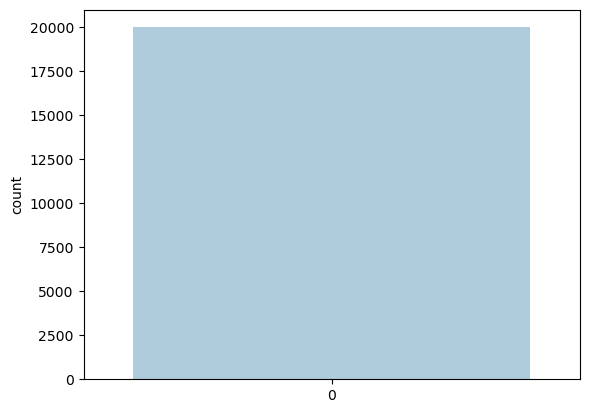

In [9]:
sns.countplot(df['xbar'], palette="Paired")

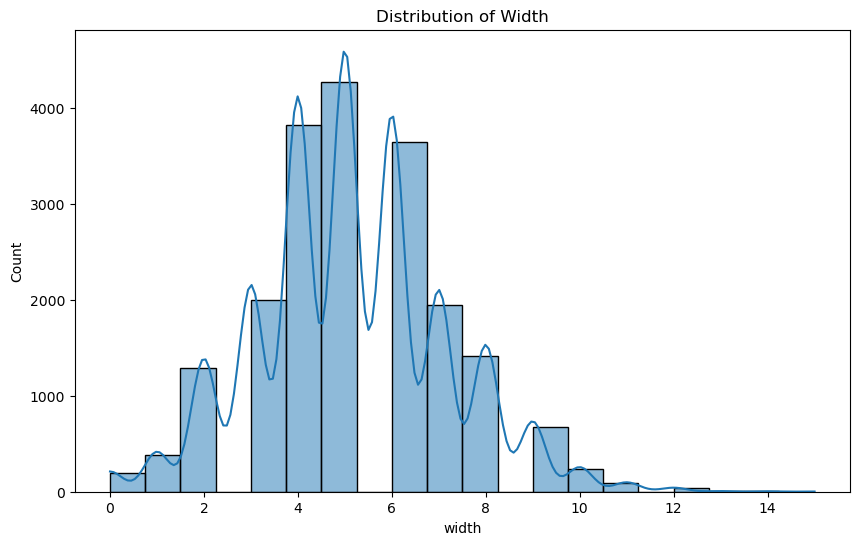

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['width'], bins=20, kde=True)
plt.title('Distribution of Width')
plt.show()

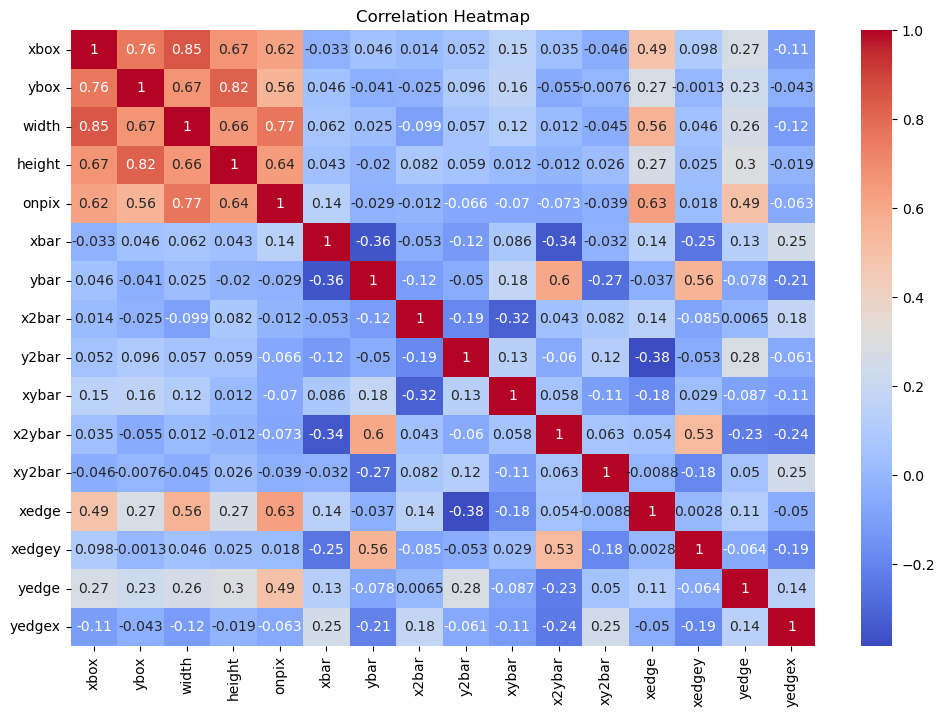

In [25]:
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='letter')
plt.title('Pair Plot of Features')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='letter', y='width', df=df)
plt.title('Violin Plot of Width by Letter')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='letter', y='height', df=df)
plt.title('Bar Plot of Average Height by Letter')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='xbox', y='ybox', df=df, hue='letter')
plt.title('Line Plot of Xbox vs Ybox')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', df=df)
plt.title('Count Plot of Letters')
plt.show()